In [1]:
import requests
from PIL import Image

In [6]:
SUBSCRIPTION_KEY = "e6e64117fbf24c47a89ecc2a6eec1835"

In [7]:
assert SUBSCRIPTION_KEY

In [8]:
face_api_url = 'https://20210207-izuna.cognitiveservices.azure.com/face/v1.0/detect'

In [66]:
img = Image.open('unnamed.jpg')

In [40]:
with open('unnamed.jpg', 'rb') as f:
    binary_img = f.read()

In [41]:
# binary_img

In [42]:
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age'
}

res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img)

In [27]:
res

<Response [200]>

In [35]:
result = res.json()
result

[{'faceId': 'dd872b2d-e28b-48c5-83b5-1015c95b4e79',
  'faceRectangle': {'top': 655, 'left': 568, 'width': 518, 'height': 518},
  'faceAttributes': {'age': 20.0}},
 {'faceId': '017d28a7-7fb2-42fd-ba23-cb3cedf15590',
  'faceRectangle': {'top': 492, 'left': 142, 'width': 456, 'height': 456},
  'faceAttributes': {'age': 5.0}}]

In [52]:
rect0 = result[0]['faceRectangle']
rect1 = result[1]['faceRectangle']

In [53]:
from PIL import ImageDraw

In [54]:
draw = ImageDraw.Draw(img)

In [57]:
draw.rectangle([(rect0['left'], rect0['top']), (rect0['left'] + rect0['width'], rect0['top'] + rect0['height'])], fill=None, outline='green', width=5)
draw.rectangle([(rect1['left'], rect1['top']), (rect1['left'] + rect1['width'], rect1['top'] + rect1['height'])], fill=None, outline='green', width=5)

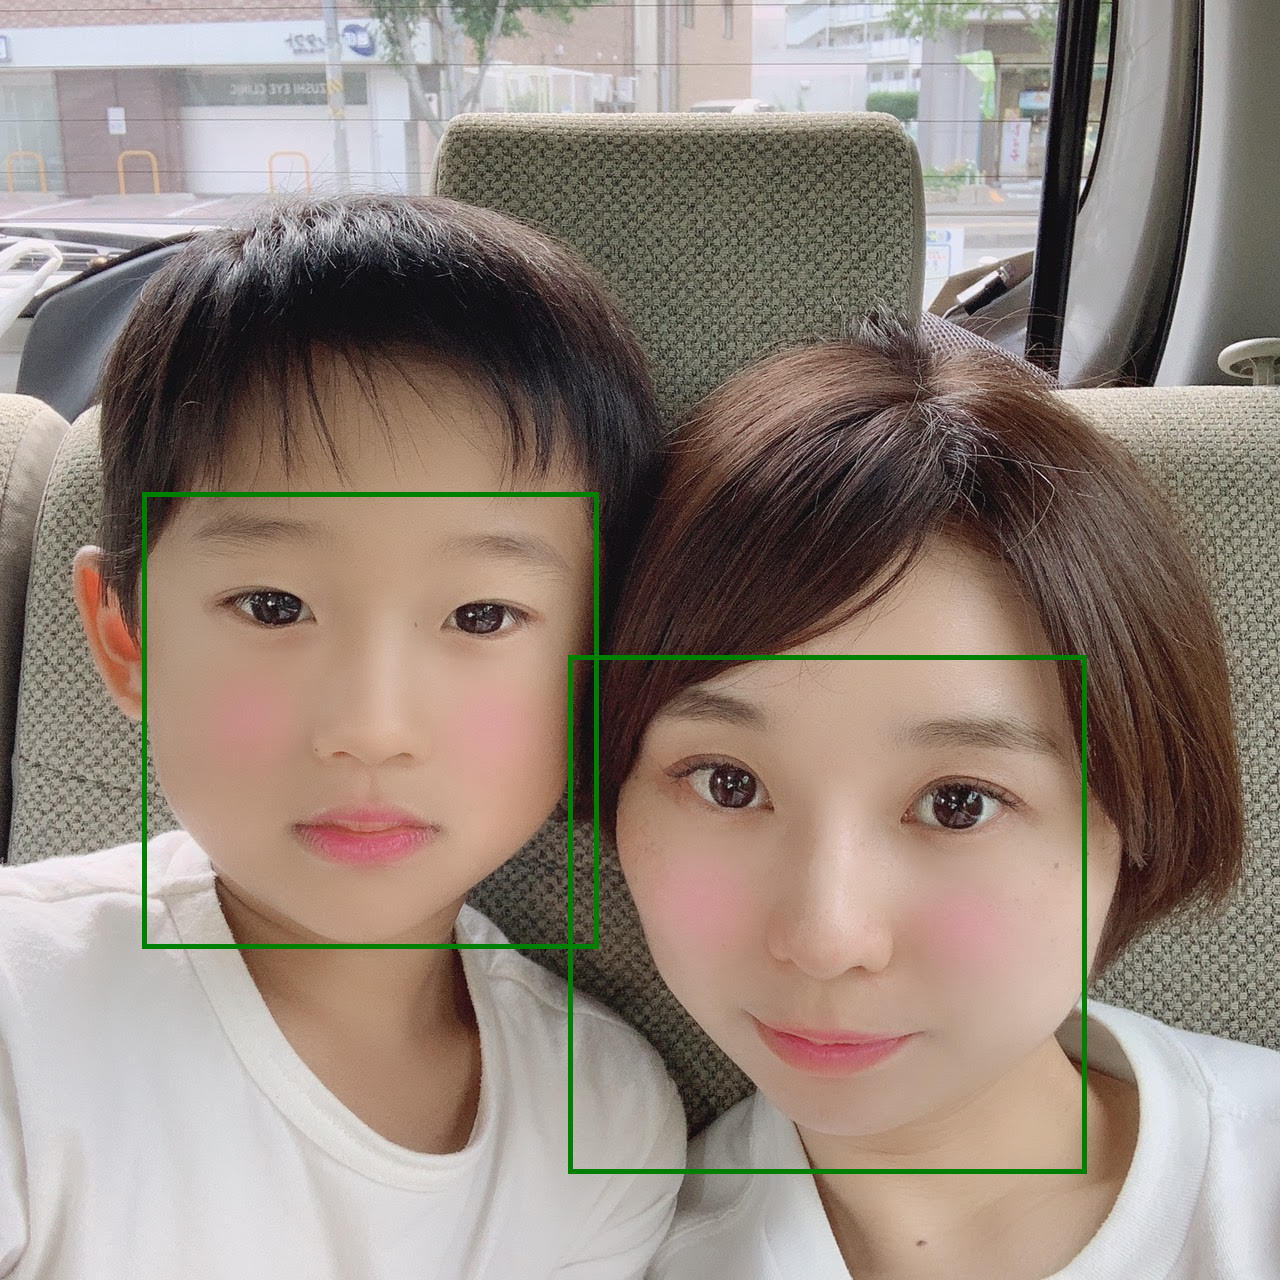

In [70]:
import requests
from PIL import Image
from PIL import ImageDraw

SUBSCRIPTION_KEY = "e6e64117fbf24c47a89ecc2a6eec1835"

assert SUBSCRIPTION_KEY

face_api_url = 'https://20210207-izuna.cognitiveservices.azure.com/face/v1.0/detect'

with open('unnamed.jpg', 'rb') as f:
    binary_img = f.read()
    
    
headers = {
    'Content-Type': 'application/octet-stream',
    'Ocp-Apim-Subscription-Key': SUBSCRIPTION_KEY
}

params = {
    'returnFaceId': 'true',
    'returnFaceAttributes': 'age'
}

res = requests.post(face_api_url, params=params,
                         headers=headers, data=binary_img)

results = res.json()

for result in results:
    rect = result['faceRectangle']

    draw = ImageDraw.Draw(img)
    draw.rectangle([(rect['left'], rect['top']), (rect['left'] + rect['width'], rect['top'] + rect['height'])], fill=None, outline='green', width=5)
img

In [71]:
import io

In [72]:
with io.BytesIO() as output:
       img.save(output, format="JPEG")
        binary_img = output.getvalue() # バイナリ取得

ValueError: unknown file extension: 